In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/SOTS_Dataset.csv')
df.head(5)

,Project,StationName,StationCode,Latitude,Longitude,TripCode,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,...,Trigonium,Tripos,Tripos (gametes),Tropidoneis,Tryblionella,Undella,Vorticella,Warnowia,Xystonella,Xystonellopsis
0,SOTS,Southern Ocean Time Series - Remote Access Sam...,SOTS_RAS,-47.0227,142.2334,SOTS_IN2019_V02_CTD12_11.7,2019-03-20T03:50:00Z,2019-03-20 03:50:00,2019,3,...,0,7.096241e+07,0,0,0.0,0.0,0.0,0,0.0,0.0
1,SOTS,Southern Ocean Time Series - Remote Access Sam...,SOTS_RAS,-47.0227,142.2334,SOTS_IN2019_V02_CTD12_11.7,2019-03-20T03:50:00Z,2019-03-20 03:50:00,2019,3,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
2,SOTS,Southern Ocean Time Series - Remote Access Sam...,SOTS_RAS,-47.0227,142.2334,SOTS_IN2019_V02_CTD2_5.3,2019-03-16T13:30:00Z,2019-03-16 13:30:00,2019,3,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
3,SOTS,Southern Ocean Time Series - Remote Access Sam...,SOTS_RAS,-47.0227,142.2334,SOTS_IN2019_V02_CTD2_5.3,2019-03-16T13:30:00Z,2019-03-16 13:30:00,2019,3,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
4,SOTS,Southern Ocean Time Series - Remote Access Sam...,SOTS_RAS,-47.0227,142.2334,SOTS_IN2019_V02_CTD3_4.5,2019-03-17T01:11:00Z,2019-03-17 01:11:00,2019,3,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0


In [3]:
df['StationCode'].unique()

array(['SOTS_RAS'], dtype=object)

In [4]:
df['SampleTime_UTC'] = pd.to_datetime(df['SampleTime_UTC'].astype(str),  format='mixed', dayfirst=True, errors='coerce')
#df.index = df['SampleTime_UTC'] 
df = df.drop(columns = ['Project','StationName','StationCode','TripCode','SampleTime_Local','Time_Local24hr','Method'])
df.loc[:, df.columns != 'SampleTime_UTC'] = df.loc[:, df.columns != 'SampleTime_UTC'].astype(float)
df.head(5)

,Latitude,Longitude,SampleTime_UTC,Year_Local,Month_Local,Day_Local,SampleDepth_m,CTDSST_degC,CTDChlaSurf_mgm3,CTDSalinity_psu,...,Trigonium,Tripos,Tripos (gametes),Tropidoneis,Tryblionella,Undella,Vorticella,Warnowia,Xystonella,Xystonellopsis
0,-47.0227,142.2334,2019-03-20 03:50:00+00:00,2019,3,20,10.0,NaN,NaN,NaN,...,0,7.096241e+07,0,0,0.0,0.0,0.0,0,0.0,0.0
1,-47.0227,142.2334,2019-03-20 03:50:00+00:00,2019,3,20,10.0,NaN,NaN,NaN,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
2,-47.0227,142.2334,2019-03-16 13:30:00+00:00,2019,3,16,10.0,NaN,NaN,NaN,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
3,-47.0227,142.2334,2019-03-16 13:30:00+00:00,2019,3,16,10.0,NaN,NaN,NaN,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0
4,-47.0227,142.2334,2019-03-17 01:11:00+00:00,2019,3,17,10.0,NaN,NaN,NaN,...,0,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0.0


In [5]:
df['SampleTime_UTC'] = pd.to_datetime(df['SampleTime_UTC'], errors='coerce')
df['YearMonthDay'] = df['SampleTime_UTC'].dt.to_period('D')
df = df.groupby('YearMonthDay').mean().reset_index()
df

/tmp/ipykernel_3441/678333289.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonthDay'] = df['SampleTime_UTC'].dt.to_period('D')


,YearMonthDay,Latitude,Longitude,SampleTime_UTC,Year_Local,Month_Local,Day_Local,SampleDepth_m,CTDSST_degC,CTDChlaSurf_mgm3,...,Trigonium,Tripos,Tripos (gametes),Tropidoneis,Tryblionella,Undella,Vorticella,Warnowia,Xystonella,Xystonellopsis
0,2010-09-12,-46.9347,142.2566,2010-09-12 03:00:00+00:00,2010.0,9.0,12.0,31.0,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
1,2010-09-21,-46.9347,142.2566,2010-09-21 03:00:00+00:00,2010.0,9.0,21.0,31.0,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2,2010-09-30,-46.9347,142.2566,2010-09-30 03:00:00+00:00,2010.0,9.0,30.0,31.0,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
3,2010-10-09,-46.9347,142.2566,2010-10-09 03:00:00+00:00,2010.0,10.0,9.0,31.0,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
4,2010-10-18,-46.9347,142.2566,2010-10-18 03:00:00+00:00,2010.0,10.0,18.0,31.0,NaN,NaN,...,0.0,4.209731e+05,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2022-04-23,-46.9858,142.2836,2022-04-23 17:00:00+00:00,2022.0,4.0,23.0,4.0,NaN,NaN,...,0.0,1.372868e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,2022-05-01,-46.9858,142.2836,2022-05-01 17:00:00+00:00,2022.0,5.0,1.0,4.0,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,2022-05-08,-47.0571,141.3822,2022-05-08 03:51:35.200000+00:00,2022.0,5.0,8.0,NaN,NaN,NaN,...,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,2023-05-15,-46.9649,141.3512,2023-05-15 07:30:00+00:00,2023.0,5.0,15.0,NaN,NaN,NaN,...,0.0,1.659423e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

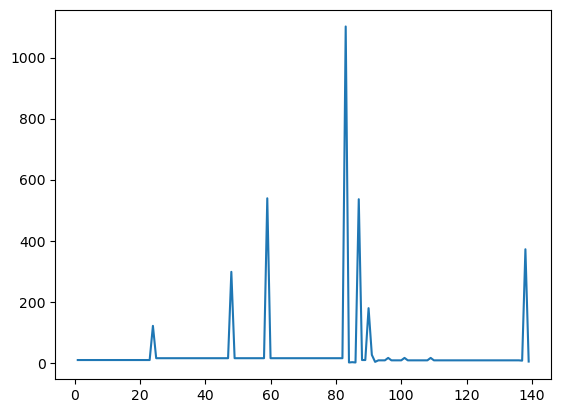

In [7]:
df['YearMonthDay'] = df['YearMonthDay'].dt.to_timestamp()
diffs = df['YearMonthDay'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.YearMonthDay.days, axis = 1)
diffs.plot()

In [8]:
#Check if successive dates are 5-7 days after each other 
df['YearMonthDay'] = pd.to_datetime(df['YearMonthDay'], errors='coerce')  # Convert to datetime
df['date_diff'] = df['YearMonthDay'].diff().dt.days

# Find where the difference is NOT in the range [5, 9]

violations = df[~df['date_diff'].between(5, 9, inclusive='both')]

# Print out the violations (excluding the first row, since it has NaN for diff)
violations

,YearMonthDay,Latitude,Longitude,SampleTime_UTC,Year_Local,Month_Local,Day_Local,SampleDepth_m,CTDSST_degC,CTDChlaSurf_mgm3,...,Tripos,Tripos (gametes),Tropidoneis,Tryblionella,Undella,Vorticella,Warnowia,Xystonella,Xystonellopsis,date_diff
0,2010-09-12,-46.9347,142.2566,2010-09-12 03:00:00+00:00,2010.0,9.0,12.0,31.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
24,2011-08-06,-46.9296,142.2147,2011-08-06 02:00:00+00:00,2011.0,8.0,6.0,34.0,NaN,NaN,...,2.175027e+06,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,121.0
25,2011-08-21,-46.9296,142.2147,2011-08-21 02:00:00+00:00,2011.0,8.0,21.0,34.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,15.0
26,2011-09-05,-46.9296,142.2147,2011-09-05 02:00:00+00:00,2011.0,9.0,5.0,34.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,15.0
27,2011-09-20,-46.9296,142.2147,2011-09-20 02:00:00+00:00,2011.0,9.0,20.0,34.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2021-05-30,-46.9858,142.2836,2021-05-30 17:00:00+00:00,2021.0,5.0,30.0,4.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
101,2021-07-17,-46.9858,142.2836,2021-07-17 17:00:00+00:00,2021.0,7.0,17.0,4.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
109,2021-09-27,-46.9858,142.2836,2021-09-27 17:00:00+00:00,2021.0,9.0,27.0,4.0,NaN,NaN,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
138,2023-05-15,-46.9649,141.3512,2023-05-15 07:30:00+00:00,2023.0,5.0,15.0,NaN,NaN,NaN,...,1.659423e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,372.0
